In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # do help with random numbers
np.random.seed(seed=42)

### Pandas Standard Deviation

Standard Deviation is the amount of 'spread' you have in your data. More variance, more spread, more standard deviation.

I like to see this explained visually, so let's create charts

Let's first create a DataFrame with two columns. One with low variance, one with high variance.

I'm going to create these via numpy random number generator. The important part is to look at the charts.

Examples to run through
1. Calculating standard deviation on a Series
1. Calculating standard deviation on a DataFrame

In [41]:
data_points = 500
df = pd.DataFrame({'low_var': np.random.normal(loc=0, scale=2, size=data_points),
                   'high_var': np.random.normal(loc=0, scale=9, size=data_points)})
df.head(5)

,low_var,high_var
0,2.361282,-7.771442
1,-1.254627,-0.280831
2,0.090445,0.162152
3,0.102396,4.253673
4,-1.003568,-12.301725


Then let's visualize our data. I'm going to plot the points on a scatter plot, and also plot the mean as a horizontal line

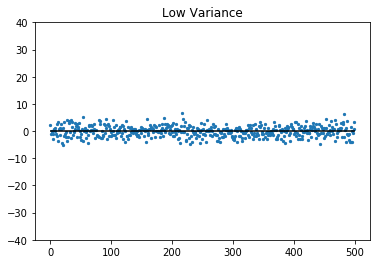

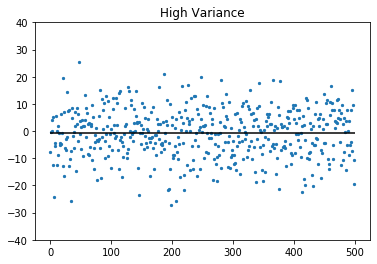

In [47]:
plt.ylim(-40,40) # Setting y limits so the axis are consistent
plt.title("Low Variance") # Setting the title 
plt.scatter(x=df.index, y=df['low_var'], s=5); # Plotting the scatter
plt.hlines(y=df['low_var'].mean(), xmin=0, xmax=data_points) # Mean line
plt.show(); # Telling matplotlib to show the chart

plt.title("High Variance")
plt.ylim(-40,40)
plt.scatter(x=df.index, y=df['high_var'], s=5);
plt.hlines(y=df['high_var'].mean(), xmin=0, xmax=data_points);

### 1. Calculating Standard Deviation on a Series

Let's calc std on a pandas series. Do to this, simply call .std() on your Series.

In [53]:
df['low_var'].std()

2.0335824820605577

In [54]:
df['high_var'].std()

8.924455248568384

### 2. Calculating Standard Deviation on a DataFrame
You can also apply this function directly to a DataFrame so it will do the std of all the columns

In [52]:
df.std()

low_var     2.033582
high_var    8.924455
dtype: float64

### 3. Extra: Plotting 1 & 2 standard deviations from the mean

Standard Deviation is used in outlier detection. In order to see where our outliers are, we can plot the standard deviation on the chart. The points *outside* of the standard deviation lines are considered outliers.

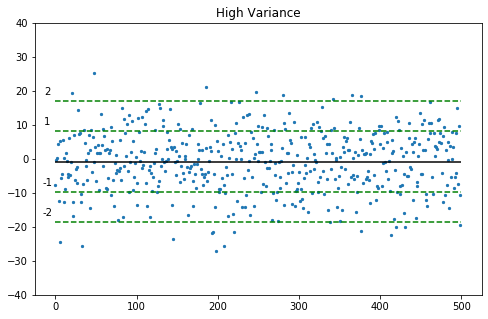

In [83]:
plt.figure(figsize=(8,5))
plt.title("High Variance") # Title
plt.ylim(-40,40) # Setting y limits
plt.scatter(x=df.index, y=df['high_var'], s=5); # Plotting scatter
plt.hlines(y=df['high_var'].mean(), xmin=0, xmax=data_points) # Mean


for std_int in [-2, -1, 1, 2]: # Going through different stds from the mean
    standard_deviation = df['high_var'].mean() + df['high_var'].std()*std_int
    
    plt.hlines(y=standard_deviation,
               xmin=0,
               xmax=data_points,
               linestyles='dashed',
               colors='green'); # 1 std above
    
    # Giving labels to the lines we just drew
    plt.text(y=standard_deviation + 2, x=-10, s=std_int, ha='center')